In [42]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd


input_folder = "./Doors"
output_folder = "./outputs/202208061155"

# Load the trained model 
model = torch.load(output_folder + '/weights.pt')
print(output_folder + 'weights.pt')
# Set the model to evaluate mode
model.eval()

./outputs/202208061155weights.pt


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [43]:
# Read the log file using pandas into a dataframe
df = pd.read_csv(output_folder + '/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

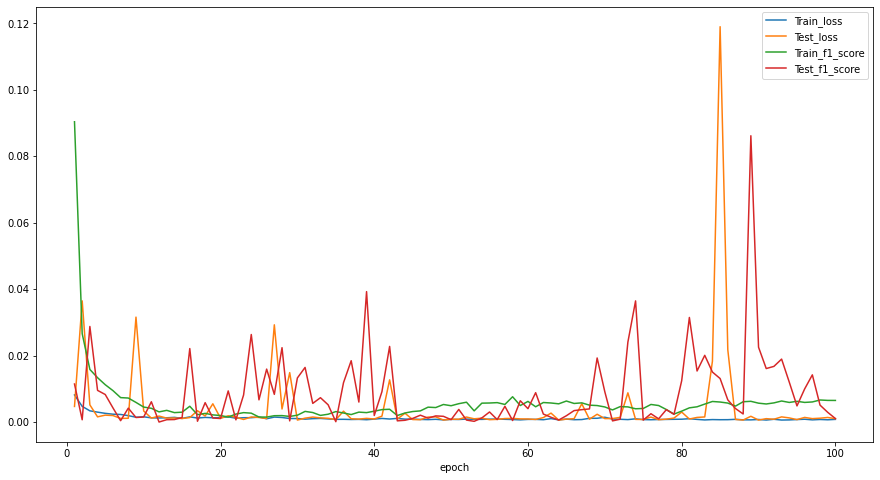

In [44]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [45]:
# print(df[['Train_auroc','Test_auroc']].max())

### Sample Prediction

In [48]:
ino = 2
# Read  a sample image and mask from the data-set
# img = cv2.imread('./DoorsMimicClosed/Images/Door0700.png').transpose(1,2,0).reshape(1,3,640,480)
img = cv2.imread(input_folder + '/Images/Door0245.png').transpose(1,2,0).reshape(1,3,640,480)
mask = cv2.imread(input_folder + '/Masks/Door0245.png')
# mask = cv2.imread('./DoorsMimicClosed/Masks/Door0700.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255) #/255 makes array of numbers from 0 to 1

(array([ 58883., 107093.,  76171.,  41388.,  14839.,   4733.,   1864.,
          1297.,    587.,    345.]),
 array([-0.00686715,  0.00525899,  0.01738512,  0.02951126,  0.0416374 ,
         0.05376353,  0.06588967,  0.0780158 ,  0.09014194,  0.10226808,
         0.11439422], dtype=float32),
 <BarContainer object of 10 artists>)

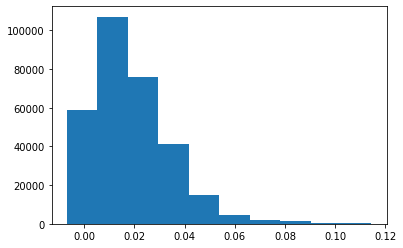

In [49]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

(-0.5, 479.5, 639.5, -0.5)

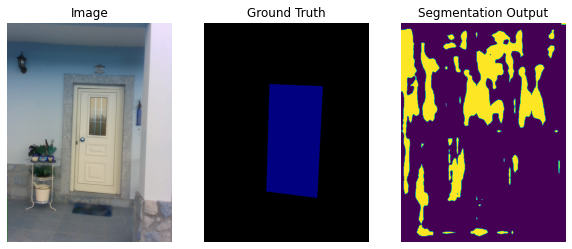

In [50]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(cv2.imread(input_folder + '/Images/Door0245.png'))
plt.title('Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(133)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]> 0.03)
plt.title('Segmentation Output')
plt.axis('off')

# plt.savefig('./DoorsMediumExp/SegmentationOutput.png',bbox_inches='tight')